In [51]:
from rapidfuzz.distance import Levenshtein
import pandas as pd
from unicodedata import normalize
import re
from tqdm import tqdm
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df = pd.read_csv('items_titles.csv')

# Normalização do Texto

Manteve os numeros de 0 a 9 pois entende são importantes para as caracteristicas do produto

In [3]:
def new_norm_corpus(text):
    text = normalize('NFKD', text).encode('ASCII','ignore').decode('ASCII')
    #text = ' '.join(s for s in text.split() if not any(c.isdigit() for c in s))
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"<[^>]*>",'',text)
    text = text.lower()
    return text

In [4]:
df['ITE_ITEM_TITLE'] = df.apply(lambda x: new_norm_corpus(x['ITE_ITEM_TITLE']), axis=1)

In [8]:
stemmer = nltk.stem.RSLPStemmer()
df["DESC"] = df["ITE_ITEM_TITLE"].apply(lambda x: stemmer.stem(x))

# Remoção de stopwords

In [15]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend(["nao"])
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(df.DESC.values)
features = vec.transform(df.DESC.values)


In [19]:
cls = MiniBatchKMeans(n_clusters=3, random_state=0)
cls.fit(features)
cls.predict(features)
cls.labels_


/Users/001141585/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, ..., 2, 1, 0], dtype=int32)

In [24]:
print(features[0])

  (0, 17369)	0.39121256610156535
  (0, 16459)	0.08592932857543636
  (0, 13802)	0.2388141304841143
  (0, 13704)	0.7026177806716967
  (0, 11882)	0.1857504752058402
  (0, 5179)	0.5043428446411267


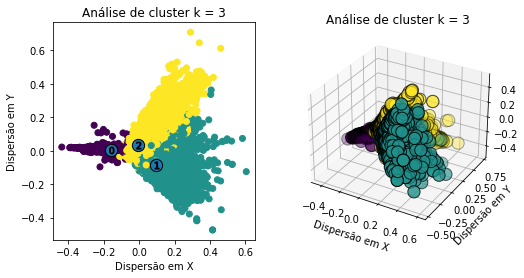

In [38]:
cluster = 3
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1)
 
pca = PCA(n_components=2, random_state= 0)
reduced_features = pca.fit_transform(features.toarray())

reduced_cluster_centers = pca.transform(cls.cluster_centers_)
   
ax.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='o', s=150, edgecolor='k')
 
for i, c in enumerate(reduced_cluster_centers):
    ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')


ax = fig.add_subplot(1, 2, 2,projection="3d")
   
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')
    
pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(features.toarray()) 
ax.scatter3D(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2], marker='o', s=150, edgecolor='k', c=cls.predict(features))
  
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
plt.show()


In [43]:
df['CLUSTER'] = list(cls.labels_)

In [44]:
df

,ITE_ITEM_TITLE,DESC,CLUSTER
0,tenis ascension posh masculino preto e vermelho,tenis ascension posh masculino preto e vermelho,2
1,tenis para caminhada super levinho spider corr...,tenis para caminhada super levinho spider corr...,2
2,tenis feminino le parc hocks blackice original...,tenis feminino le parc hocks blackice original...,1
3,tenis olympikus esportivo academia nova tenden...,tenis olympikus esportivo academia nova tenden...,2
4,inteligente led bicicleta tauda luz usb bicicl...,inteligente led bicicleta tauda luz usb bicicl...,0
...,...,...,...
29995,tenis vans old skool i love my vans usado fe...,tenis vans old skool i love my vans usado fe...,2
29996,tenis feminino preto moleca 5296155,tenis feminino preto moleca 5296155,1
29997,tenis botinha com pelo via marte original lanc...,tenis botinha com pelo via marte original lanc,2
29998,tenis slip on feminino masculino original sapa...,tenis slip on feminino masculino original sapa...,1


In [45]:
df.to_csv('CLUSTER_TITULOS.csv')

In [70]:
for cluster in range(2,4):
  
    cls = MiniBatchKMeans(n_clusters=cluster, random_state=0)
    cls.fit(features)
    cls.predict(features)
    cls.labels_
    silhouette_avg = silhouette_score(features, cls.labels_)
    print("Cluster: ", cluster)
    print("silhouette_avg",silhouette_avg)

/Users/001141585/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster:  2
silhouette_avg 0.006378719757621242


/Users/001141585/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster:  3
silhouette_avg 0.007542408579831779


Dentro do desafio dois não fica claro sobre o dataset “items_titles.csv”, é descrito apenas que são titulos de 30 mil produtos de três categorias, antes dessa explicação, é informado que constantemente existe um desafio de agrupamento de produtos similares utilizando atributos dos produtos. Como o unico atributo existente no momento foi o titulo do item, optei por realizar uma clusterização com o uso de k-means, o resultado não foi exatamente um sucesso.

Como é possivel observar no gráfrico "Analise de Cluster k=3" os centroides ficaram muito próximos das bordas dos clusters e tambem a avaliação pela metrica de silhueta média não demonstra um bom valor. Porém o resultado pode ser melhor quando aumentado o numero de clusters.